# Gambler's Problem (Example 4.3)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
theta = 1e-8
gamma = 1
p_h = 0.4
delta = float("inf")
target_capital = 100
states = np.arange(1, target_capital)
V = np.zeros(target_capital - 1)
sweeps = []

while delta > theta:
    delta = 0
    for state in states:
        v = V[state - 1]
        V[state - 1] = max(
            [
                p_h * (state + stake == target_capital or gamma * V[state - 1 + stake])
                + (1 - p_h) * (0 if state == stake else gamma * V[state - 1 - stake])
                for stake in range(1, min(state, target_capital - state ) + 1)
            ]
        )
        delta = max(delta, abs(v - V[state - 1]))
    sweeps.append(V.copy())

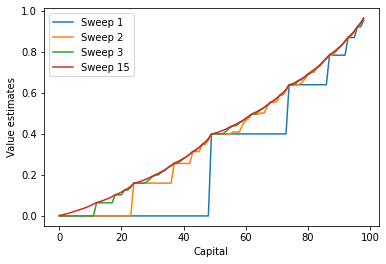

In [3]:
sweep_1, = plt.plot(sweeps[0], label="Sweep 1")
sweep_2, = plt.plot(sweeps[1], label="Sweep 2")
sweep_3, = plt.plot(sweeps[2], label="Sweep 3")
last_sweep, = plt.plot(sweeps[-1], label=f"Sweep {len(sweeps)}")
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.legend(handles=[sweep_1, sweep_2, sweep_3, last_sweep])

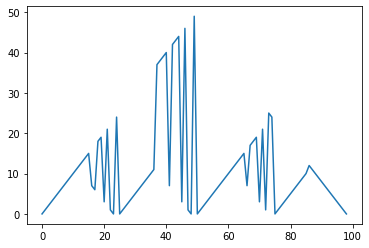

In [4]:
policy = np.array([
    np.argmax([
        p_h * (state + stake == target_capital or gamma * V[state - 1 + stake])
        + (1 - p_h) * (0 if state == stake else gamma * V[state - 1 - stake])
        for stake in range(1, min(state, target_capital - state ) + 1)
    ])
    for state in states
])

plt.plot(policy)